In [2]:
!pip install tensorflow

You should consider upgrading via the 'C:\Users\Mages\python.exe -m pip install --upgrade pip' command.


In [3]:
from tensorflow.keras.models import Sequential,load_model 

In [4]:
from tensorflow.keras.layers import LSTM, Dense 

In [5]:
from tensorflow.keras.layers import Dropout, Activation, Flatten

In [6]:
import warnings 

In [7]:
warnings.filterwarnings("ignore") 

In [8]:
import numpy as np

In [9]:
import matplotlib.pyplot as plt 

In [10]:
import pandas as pd

In [11]:
from sklearn.preprocessing import MinMaxScaler 

In [12]:
data = pd.read_csv('fake_job_postings.csv', date_parser = True)

In [13]:
data=data.dropna() 

In [14]:
data.columns

Index(['job_id', 'title', 'location', 'department', 'salary_range',
       'company_profile', 'description', 'requirements', 'benefits',
       'telecommuting', 'has_company_logo', 'has_questions', 'employment_type',
       'required_experience', 'required_education', 'industry', 'function',
       'fraudulent'],
      dtype='object')

In [15]:
from sklearn.preprocessing import LabelEncoder

In [16]:
var_mod = ['job_id', 'title', 'location', 'department', 'salary_range', 
'company_profile', 'description', 'requirements', 'benefits', 
'telecommuting', 'has_company_logo', 'has_questions', 'employment_type', 
'required_experience', 'required_education', 'industry', 'function', 
'fraudulent'] 

In [17]:
le = LabelEncoder() 

In [18]:
for i in var_mod: 
    data[i] = le.fit_transform(data[i]).astype(int) 

In [20]:
from sklearn.metrics import confusion_matrix, classification_report, matthews_corrcoef, cohen_kappa_score, accuracy_score, average_precision_score, roc_auc_score 

In [21]:
X = data.drop(labels='fraudulent', axis=1) 

In [22]:
#Response variable  
y = data.loc[:,'fraudulent']

In [23]:
from sklearn.model_selection import train_test_split 

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=1, stratify=y) 

In [25]:
scaler = MinMaxScaler()

In [26]:
data_training = scaler.fit_transform(X_train)

In [27]:
data_training

array([[0.36103896, 0.12418301, 0.98148148, ..., 0.33333333, 0.2238806 ,
        0.2       ],
       [0.74805195, 0.88888889, 0.09259259, ..., 0.33333333, 0.40298507,
        0.2       ],
       [0.75584416, 0.1372549 , 0.04166667, ..., 0.44444444, 0.56716418,
        0.57142857],
       ...,
       [0.77402597, 0.5620915 , 0.19907407, ..., 0.11111111, 0.56716418,
        0.62857143],
       [0.79480519, 0.5130719 , 0.60648148, ..., 0.77777778, 0.92537313,
        0.51428571],
       [0.82857143, 0.20751634, 0.79166667, ..., 0.11111111, 0.67164179,
        0.74285714]], shape=(387, 17))

In [28]:
scaler = MinMaxScaler() 

In [29]:
data_testing = scaler.fit_transform(X_test)

In [30]:
data_testing

array([[0.86658031, 0.54071661, 0.14553991, ..., 0.125     , 0.18181818,
        0.82857143],
       [0.33290155, 0.73289902, 0.15962441, ..., 0.125     , 0.87878788,
        0.51428571],
       [0.94430052, 0.95114007, 0.29577465, ..., 0.25      , 0.53030303,
        0.25714286],
       ...,
       [0.85362694, 0.29478827, 0.82159624, ..., 0.375     , 0.21212121,
        0.88571429],
       [0.69948187, 0.74429967, 0.18779343, ..., 0.875     , 0.53030303,
        0.88571429],
       [0.74093264, 0.69381107, 1.        , ..., 0.        , 0.6969697 ,
        0.8       ]], shape=(387, 17))

In [31]:
data_training[0:10]

array([[0.36103896, 0.12418301, 0.98148148, 0.19502075, 0.49498328,
        0.1025641 , 0.67826087, 0.51100629, 0.43076923, 0.        ,
        1.        , 1.        , 0.25      , 0.        , 0.33333333,
        0.2238806 , 0.2       ],
       [0.74805195, 0.88888889, 0.09259259, 0.05394191, 0.14715719,
        0.71794872, 0.5826087 , 0.90566038, 0.35192308, 0.        ,
        1.        , 1.        , 0.25      , 1.        , 0.33333333,
        0.40298507, 0.2       ],
       [0.75584416, 0.1372549 , 0.04166667, 0.55186722, 0.46153846,
        0.95384615, 0.96086957, 0.58805031, 0.39807692, 0.        ,
        1.        , 0.        , 0.25      , 0.5       , 0.44444444,
        0.56716418, 0.57142857],
       [0.4025974 , 0.32189542, 0.91203704, 0.6473029 , 0.1270903 ,
        0.52307692, 0.5       , 0.20283019, 0.68846154, 0.        ,
        1.        , 1.        , 0.25      , 0.83333333, 0.33333333,
        0.73134328, 0.34285714],
       [0.1974026 , 0.21405229, 0.4212963 , 0.261410

In [32]:
X_train1 = [] 

In [33]:
y_train1 = [] 

In [34]:
for i in range(60, data_training.shape[0]): 
    X_train1.append(data_training[i-60:i]) 
    y_train1.append(data_training[i, 0])

In [35]:
X_train, y_train = np.array(X_train1), np.array(y_train1)

In [36]:
X_train.shape

(327, 60, 17)

In [37]:
X_test1 = []

In [38]:
y_test1 = []

In [39]:
for i in range(60, data_training.shape[0]): 
    X_train1.append(data_training[i-60:i]) 
    y_train1.append(data_training[i, 0]) 

In [40]:
X_train, y_train = np.array(X_train1), np.array(y_train1)

In [41]:
X_train.shape

(654, 60, 17)

In [42]:
X_test1 = [] 

In [43]:
y_test1 = []

In [44]:
for i in range(60, data_testing.shape[0]): 
    X_test1.append(data_testing[i-60:i]) 
    y_test1.append(data_testing[i, 0]) 

In [45]:
X_test, y_test = np.array(X_test1), np.array(y_test1)

In [46]:
X_test.shape

(327, 60, 17)

In [47]:
# Initialising the RNN 
model = Sequential()

In [48]:
# Adding the first LSTM layer and some Dropout regularisation 
model.add(LSTM(24, return_sequences=True,input_shape=(X_train.shape[1], X_train.shape[2])))  # returns a sequence of vectors of dimension 64

In [49]:
model.add(Dropout(0.2)) 

In [50]:
# Adding a second LSTM layer and some Dropout regularisation 
model.add(LSTM(units = 50)) 

In [53]:
#model.add(Dropout(0.2)) 
model.add(Dense(10,activation='relu'))

In [54]:
# Adding the output layer 
#model.add(Dense(1, activation="linear"))
model.add(Dense(1)) 
#model.add(Dense(units = 1)) 

In [55]:
# Compiling the RNN 
model.compile(optimizer = 'adam', loss = 'mean_squared_error',metrics=['accuracy']) 
history=model.fit(X_train, y_train,batch_size=2, epochs=40)

Epoch 1/40
327/327 ━━━━━━━━━━━━━━━━━━━━ 12s 25ms/step - accuracy: 0.0031 - loss: 0.0989
Epoch 2/40
327/327 ━━━━━━━━━━━━━━━━━━━━ 8s 25ms/step - accuracy: 0.0046 - loss: 0.0930
Epoch 3/40
327/327 ━━━━━━━━━━━━━━━━━━━━ 10s 25ms/step - accuracy: 0.0046 - loss: 0.0902
Epoch 4/40
327/327 ━━━━━━━━━━━━━━━━━━━━ 10s 25ms/step - accuracy: 0.0061 - loss: 0.0881
Epoch 5/40
327/327 ━━━━━━━━━━━━━━━━━━━━ 8s 25ms/step - accuracy: 0.0046 - loss: 0.0851    
Epoch 6/40
327/327 ━━━━━━━━━━━━━━━━━━━━ 8s 25ms/step - accuracy: 0.0061 - loss: 0.0833
Epoch 7/40
327/327 ━━━━━━━━━━━━━━━━━━━━ 8s 25ms/step - accuracy: 0.0061 - loss: 0.0814
Epoch 8/40
327/327 ━━━━━━━━━━━━━━━━━━━━ 8s 26ms/step - accuracy: 0.0061 - loss: 0.0784
Epoch 9/40
327/327 ━━━━━━━━━━━━━━━━━━━━ 8s 26ms/step - accuracy: 0.0061 - loss: 0.0758
Epoch 10/40
327/327 ━━━━━━━━━━━━━━━━━━━━ 8s 25ms/step - accuracy: 0.0061 - loss: 0.0725
Epoch 11/40
327/327 ━━━━━━━━━━━━━━━━━━━━ 8s 26ms/step - accuracy: 0.0046 - loss: 0.0726
Epoch 12/40
327/327 ━━━━━━━━━━━━━━

In [56]:
# Model summary for number of parameters use in the algorithm  
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 60, 24)              │           4,032 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 60, 24)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 50)                  │          15,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 10)                  │             510 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              11 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 58,661 (229.15 KB)

 Trainable params: 19,553 (76.38 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 39,108 (152.77 KB)

In [57]:
def graph(): 
    #Plot training & validation accuracy values 
    plt.plot(history.history['accuracy']) 
    plt.plot(history.history['loss']) 
    plt.title('Model accuracy') 
    plt.ylabel('Accuracy') 
    plt.xlabel('Epoch') 
    plt.legend(['Train', 'Test'], loc='upper left') 
    plt.show() 
    # Plot training & validation loss values 
    plt.plot(history.history['accuracy']) 
    plt.plot(history.history['loss']) 
    plt.title('Model loss') 
    plt.ylabel('Loss') 
    plt.xlabel('Epoch') 
    plt.legend(['Train', 'Test'], loc='upper left') 
    plt.show() 

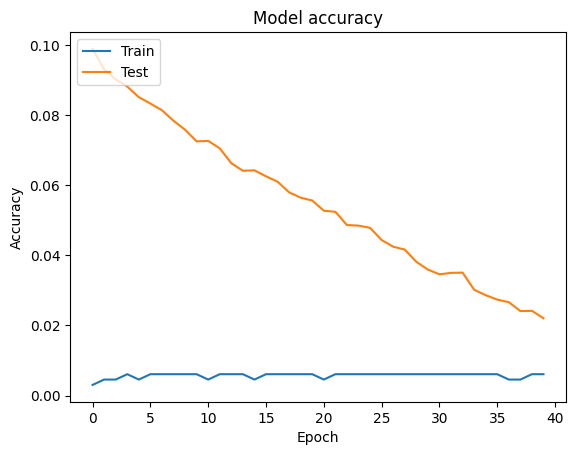

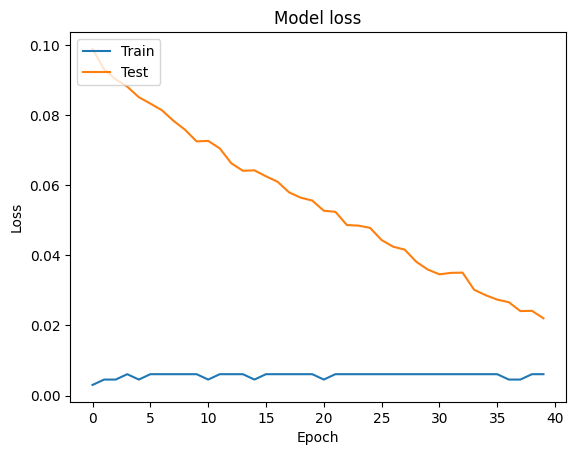

In [58]:
graph()

In [59]:
scores = model.predict(X_test) 

11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 62ms/step


In [60]:
import math, time 

In [61]:
print("") 
trainScore = model.evaluate(X_train, y_train, verbose=0)

In [62]:
print('Train Score: %.2f MSE (%.2f RMSE)' % (trainScore[0], math.sqrt(trainScore[0]))) 
print("")

Train Score: 0.02 MSE (0.14 RMSE)



In [63]:
testScore = model.evaluate(X_test, y_test, verbose=0) 
print('Test Score: %.2f MSE (%.2f RMSE)' % (testScore[0], math.sqrt(testScore[0]))) 

Test Score: 0.15 MSE (0.39 RMSE)
